<a href="https://colab.research.google.com/github/aastharc/Pneumonia-detection-using-Deep-Learning/blob/main/major_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras import layers, Model, backend
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras import Model
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers.schedules import PolynomialDecay
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import datetime
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt # Visualization
import matplotlib.image as implt # Visualization
import seaborn as sns # Visualization
import os
import numpy as np

In [ ]:
import csv

# Define input and output file paths
input_file = '/content/BBox_List_2017.csv'
output_file = '/content/output.csv'

# Initialize a list to store extracted IDs
extracted_ids = []

# Open the input CSV file for reading
with open(input_file, 'r', newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip header row if present
    for row in reader:
        # Check if the second column contains 'no findings'
        if row[1].strip().lower() == 'No Findings':
            # If condition is met, append the ID from the first column
            extracted_ids.append(row[0])

# Write extracted IDs to a new CSV file
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    # Write header if needed
    # writer.writerow(['ID'])
    # Write extracted IDs
    writer.writerows([[id] for id in extracted_ids])

print("Extracted IDs have been saved to", output_file)


Extracted IDs have been saved to /content/output.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X=np.load("/content/drive/MyDrive/x_grey_6090.npy")
y=np.load("/content/drive/MyDrive/y_grey_6090.npy")

In [ ]:
X=np.load("/content/drive/MyDrive/Numpy_dataset/train/x_grey_6090.npy")
y=np.load("/content/drive/MyDrive/Numpy_dataset/train/y_grey_6090.npy")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Numpy_dataset/train/x_grey_6090.npy'

In [ ]:
from sklearn.model_selection import train_test_split#this has the word test but it is actually for validation
from tensorflow.keras.utils import to_categorical
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 101, stratify=y)
y_train = to_categorical(y_train, num_classes = 2)
y_valid = to_categorical(y_valid, num_classes = 2)
del X, y

In [ ]:
model.load_weights("/content/drive/MyDrive/wt.weights_grey_pat.h5")

In [ ]:
import h5py

# Open the HDF5 file
with h5py.File("/content/drive/MyDrive/all_model_results/latestweight.h5", "r") as f:
    # List the groups and datasets
    list(f.keys())
    print("Groups:")
    for group in f.keys():
        print(group)
    print("\nDatasets:")
    for dataset in f["layers"].keys():
        print(dataset)
'''
    # Get information about a specific dataset
    dataset = f["layers"]["layer_1"]
    print("\nShape:", dataset.shape)
    print("Data type:", dataset.dtype)
    '''

Groups:
layers
metrics
optimizer
vars

Datasets:
activation
activation_1
activation_2
activation_3
activation_4
activation_5
activation_6
activation_7
activation_8
activation_9
batch_normalization
batch_normalization_1
batch_normalization_2
batch_normalization_3
batch_normalization_4
batch_normalization_5
batch_normalization_6
batch_normalization_7
batch_normalization_8
batch_normalization_9
conv2d
conv2d_1
conv2d_10
conv2d_2
conv2d_3
conv2d_4
conv2d_5
conv2d_6
conv2d_7
conv2d_8
conv2d_9
dense
dense_1
dense_2
dense_3
dense_4
dense_5
dense_6
dropout
flatten
input_layer
max_pooling2d
max_pooling2d_1
max_pooling2d_2
max_pooling2d_3
max_pooling2d_4


'\n    # Get information about a specific dataset\n    dataset = f["layers"]["layer_1"]\n    print("\nShape:", dataset.shape)\n    print("Data type:", dataset.dtype)\n    '

In [ ]:
#from keras.models import load_model
loaded_model=load_model('/content/drive/MyDrive/all_model_results/latestweight.h5')

ValueError: No model config found in the file at <tensorflow.python.platform.gfile.GFile object at 0x7be5af783340>.

In [ ]:
import h5py
import numpy as np
f1 = h5py.File('/content/drive/MyDrive/all_model_results/latestweight.h5','r+')
f1



<HDF5 file "latestweight.h5" (mode r+)>

In [ ]:
f1.keys()

<KeysViewHDF5 ['layers', 'metrics', 'optimizer', 'vars']>

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
saved_model = load_model('path_to_saved_model.h5')

# Define the architecture of the new model you're trying to load weights into
#new_model = YourModelDefinitionFunctio()  # Replace YourModelDefinitionFunction with your model definition function

# Print the summary of both models to compare their architectures
print("Saved Model Summary:")
print(saved_model.summary())

print("\nNew Model Summary:")
print(model.summary())

# If you have access to layer names, you can compare layer by layer
saved_model_layers = [layer.name for layer in saved_model.layers]
model_layers = [layer.name for layer in model.layers]

print("\nSaved Model Layers:", saved_model_layers)
print("New Model Layers:", new_model_layers)

# Compare the layers
if saved_model_layers == new_model_layers:
    print("The layer structures match.")
else:
    print("The layer structures do not match. Investigate further.")


In [ ]:
channel_axis = -1# if backend.image_data_format() == 'channels_first' else -1
def model():
    img_input = layers.Input(shape = (224, 224, 1))
    x = layers.Conv2D(32, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block1_conv1')(img_input)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block1_bn1')(x)
    x = layers.Activation('relu', name = 'block1_act1')(x)
    x = layers.Conv2D(32, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block1_conv2')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block1_bn2')(x)
    x = layers.Activation('relu', name = 'block1_act2')(x)
    x = layers.MaxPooling2D((2, 2),
                            strides=(2, 2),
                            padding='same',
                            name='block1_pool')(x)

    # block 2
    x = layers.Conv2D(64, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block2_conv1')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block2_bn1')(x)
    x = layers.Activation('relu', name = 'block2_act1')(x)
    x = layers.Conv2D(64, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block2_conv2')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block2_bn2')(x)
    x = layers.Activation('relu', name = 'block2_act2')(x)
    x = layers.MaxPooling2D((2, 2),
                            strides=(2, 2),
                            padding='same',
                            name='block2_pool')(x)

    # block 3
    x = layers.Conv2D(128, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block3_conv1')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block3_bn1')(x)
    x = layers.Activation('relu', name = 'block3_act1')(x)
    x = layers.Conv2D(128, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block3_conv2')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block3_bn2')(x)
    x = layers.Activation('relu', name = 'block311_act2')(x)
    x = layers.MaxPooling2D((3, 3),
                            strides=(3, 3),
                            padding='same',
                            name='block3_pool')(x)

    x = layers.Conv2D(256, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block31_conv1')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block31_bn1')(x)
    x = layers.Activation('relu', name = 'block31_act1')(x)
    x = layers.Conv2D(128, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block31_conv2')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block31_bn2')(x)
    x = layers.Activation('relu', name = 'block31_act2')(x)
    x = layers.MaxPooling2D((3, 3),
                            strides=(3, 3),
                            padding='same',
                            name='block31_pool')(x)

  # block 4
    x = layers.Conv2D(1024, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block41_conv1')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block41_bn1')(x)
    x = layers.Activation('relu', name = 'block41_act1')(x)
    x = layers.Conv2D(512, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block41_conv2')(x)
    x = layers.Dropout(0.5, name = 'block4_dropout')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block4_bn2')(x)
    x = layers.Activation('relu', name = 'block4_act2')(x)
    x = layers.MaxPooling2D((3, 3),
                            strides=(3, 3),
                            padding='same',
                            name='block4_pool')(x)
    x = layers.Flatten(name='flatten')(x)
    x = layers.Dense(512, activation='relu', name='fc1')(x)
    x = layers.Dense(1024, activation='relu', name='fc11')(x)
    x = layers.Dense(512, activation='relu', name='fc3')(x)
    x = layers.Dense(512, activation='relu', name='fc4')(x)
    x = layers.Dense(256, activation='relu', name='fc5')(x)
    x = layers.Dense(64, activation='relu', name='fc6')(x)
    x = layers.Dense(2, activation='softmax', name='predictions')(x)
    model = Model(inputs=img_input, outputs=x, name = 'own_build_model')
    return model
model = model()
model.summary()

Model: "own_build_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 32)      288       
                                                                 
 block1_bn1 (BatchNormaliza  (None, 224, 224, 32)      128       
 tion)                                                           
                                                                 
 block1_act1 (Activation)    (None, 224, 224, 32)      0         
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 32)      9216      
                                                                 
 block1_bn2 (BatchNormaliza  (None, 224, 224, 32)      128       
 tion)                                             

In [ ]:
loaded_model = create_model()  # Recreate the model
loaded_model.load_weights("/content/drive/MyDrive/wt.weights_28_04.h5")
loaded_model.summary()

NameError: name 'create_model' is not defined

In [ ]:
import tensorflow as tf

# Set the seed for hash based operations in python
os.environ['PYTHONHASHSEED'] = '0'

# Set the numpy seed
np.random.seed(111)

# Set the random seed in tensorflow at graph level
tf.random.set_seed(111)
from random import seed
seed(111)

In [ ]:

LEARN_RATE = 1e-5
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(lr = LEARN_RATE), loss = 'categorical_crossentropy',
                           metrics = ['categorical_accuracy'])

In [ ]:
LEARN_RATE = 1e-5
from tensorflow.keras.optimizers import Adam
model_own.compile(optimizer = Adam(lr = LEARN_RATE), loss = 'categorical_crossentropy',
                           metrics = ['categorical_accuracy'])

In [ ]:
history = model.fit(x_train,y_train,batch_size = 16,
                    epochs = 200, verbose=2,  validation_split=0.2, callbacks=callbacks_list)

Epoch 1/200

Epoch 1: val_loss improved from inf to 0.22051, saving model to /content/wt.weights_grey_pat.h5
244/244 - 59s - loss: 0.1645 - categorical_accuracy: 0.9466 - val_loss: 0.2205 - val_categorical_accuracy: 0.9128 - lr: 0.0010 - 59s/epoch - 240ms/step
Epoch 2/200

Epoch 2: val_loss improved from 0.22051 to 0.14941, saving model to /content/wt.weights_grey_pat.h5
244/244 - 32s - loss: 0.1436 - categorical_accuracy: 0.9515 - val_loss: 0.1494 - val_categorical_accuracy: 0.9415 - lr: 0.0010 - 32s/epoch - 133ms/step
Epoch 3/200

Epoch 3: val_loss did not improve from 0.14941
244/244 - 34s - loss: 0.1518 - categorical_accuracy: 0.9464 - val_loss: 0.2659 - val_categorical_accuracy: 0.9251 - lr: 0.0010 - 34s/epoch - 138ms/step
Epoch 4/200

Epoch 4: val_loss did not improve from 0.14941
244/244 - 34s - loss: 0.2244 - categorical_accuracy: 0.9243 - val_loss: 0.2179 - val_categorical_accuracy: 0.9528 - lr: 0.0010 - 34s/epoch - 138ms/step
Epoch 5/200

Epoch 5: val_loss did not improve fro

In [ ]:
history = model.fit(x_train,y_train,batch_size = 16,
                    epochs = 200, verbose=2,  validation_split=0.2, callbacks=callbacks_list)
model_own.save_weights("/content/drive/My Drive/save.own_weights_e-5.h5")

Epoch 1/200

Epoch 1: val_loss did not improve from 0.12110
244/244 - 104s - loss: 0.4753 - categorical_accuracy: 0.8214 - val_loss: 1.8604 - val_categorical_accuracy: 0.5036 - lr: 0.0010 - 104s/epoch - 427ms/step
Epoch 2/200

Epoch 2: val_loss did not improve from 0.12110
244/244 - 71s - loss: 0.3284 - categorical_accuracy: 0.8771 - val_loss: 0.3173 - val_categorical_accuracy: 0.9015 - lr: 0.0010 - 71s/epoch - 292ms/step
Epoch 3/200

Epoch 3: val_loss did not improve from 0.12110
244/244 - 71s - loss: 0.2732 - categorical_accuracy: 0.9115 - val_loss: 0.3843 - val_categorical_accuracy: 0.8738 - lr: 0.0010 - 71s/epoch - 292ms/step
Epoch 4/200

Epoch 4: val_loss did not improve from 0.12110
244/244 - 73s - loss: 0.2564 - categorical_accuracy: 0.9097 - val_loss: 0.1920 - val_categorical_accuracy: 0.9272 - lr: 0.0010 - 73s/epoch - 299ms/step
Epoch 5/200

Epoch 5: val_loss did not improve from 0.12110
244/244 - 71s - loss: 0.2608 - categorical_accuracy: 0.9040 - val_loss: 0.3718 - val_categ

In [ ]:
history = model.fit(x_train,y_train,batch_size = 16,
                    epochs = 200, verbose=2,  validation_split=0.2, callbacks=callbacks_list)

Epoch 1/200

Epoch 1: val_loss improved from inf to 0.69465, saving model to /content/wt.weights_grey_pat.h5
244/244 - 54s - loss: 0.5131 - categorical_accuracy: 0.8078 - val_loss: 0.6946 - val_categorical_accuracy: 0.5200 - lr: 0.0010 - 54s/epoch - 223ms/step
Epoch 2/200

Epoch 2: val_loss improved from 0.69465 to 0.60701, saving model to /content/wt.weights_grey_pat.h5
244/244 - 33s - loss: 0.2820 - categorical_accuracy: 0.8953 - val_loss: 0.6070 - val_categorical_accuracy: 0.6092 - lr: 0.0010 - 33s/epoch - 135ms/step
Epoch 3/200

Epoch 3: val_loss did not improve from 0.60701
244/244 - 34s - loss: 0.2085 - categorical_accuracy: 0.9287 - val_loss: 0.9474 - val_categorical_accuracy: 0.6010 - lr: 0.0010 - 34s/epoch - 139ms/step
Epoch 4/200

Epoch 4: val_loss improved from 0.60701 to 0.22318, saving model to /content/wt.weights_grey_pat.h5
244/244 - 33s - loss: 0.1879 - categorical_accuracy: 0.9376 - val_loss: 0.2232 - val_categorical_accuracy: 0.9210 - lr: 0.0010 - 33s/epoch - 135ms/st

In [ ]:
#model.load_weights("/content/wt.weights.h5")
model.load_weights("/content/drive/MyDrive/save.weights_e-5.h5")

ValueError: Layer count mismatch when loading weights from file. Model expected 27 layers, found 28 saved layers.

In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

#weight_path="{}.weights.hdf5".format('save')
#model3.save('model.hdf5')
weight_path='/content/wt.weights_grey_pat.h5'
checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1,
                             save_best_only=True, mode='min', save_weights_only = True)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8,
                              patience=5, verbose=1, mode='auto',
                              epsilon=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss",
                      mode="min",
                      patience=80) # probably needs to be more patient, but kaggle time is limited, increased from 40 to 60
callbacks_list = [checkpoint, early,reduceLROnPlat]

In [ ]:
channel_axis = -1
def model_own():
  img_input = layers.Input(shape = (224, 224, 1))
  x = layers.BatchNormalization(axis = channel_axis, name = 'batch_norm1')(img_input)
  x = layers.Conv2D(64, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'conv_layer1')(x)
  x = layers.BatchNormalization(axis = channel_axis, name = 'batch_norm2')(x)
  x = layers.Activation('relu', name = 'act1')(x)

  x = layers.Conv2D(64, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'conv_layer2')(x)
  x = layers.BatchNormalization(axis = channel_axis, name = 'batch_norm3')(x)
  x = layers.Activation('relu', name = 'act2')(x)
  x = layers.MaxPooling2D((2, 2),
                            strides=(2, 2),
                            padding='same',
                            name='max_pool1')(x)
  x = layers.Conv2D(64, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'conv_layer3')(img_input)
  x = layers.BatchNormalization(axis = channel_axis, name = 'batch_norm4')(x)
  x = layers.Activation('relu', name = 'act3')(x)
  x = layers.Conv2D(64, (5,5),
                      padding = 'same', use_bias = False,
                      name = 'conv_layer4')(x)
  x = layers.BatchNormalization(axis = channel_axis, name = 'batch_norm5')(x)
  x = layers.Activation('relu', name = 'act4')(x)
  x = layers.MaxPooling2D((3,3),
                            strides=(2, 2),
                            padding='same',
                            name='max_pool2')(x)

  x = layers.Conv2D(128, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'conv_layer5')(x)
  x = layers.BatchNormalization(axis = channel_axis, name = 'batch_norm6')(x)
  x = layers.Activation('relu', name = 'act5')(x)
  x = layers.Conv2D(128, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'conv_layer6')(x)
  x = layers.BatchNormalization(axis = channel_axis, name = 'batch_norm7')(x)
  x = layers.Activation('relu', name = 'act6')(x)
  x = layers.MaxPooling2D((3, 3),
                            strides=(3, 3),
                            padding='same',
                            name='max_pool3')(x)
  x = layers.Conv2D(128, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'conv_layer7')(x)
  x = layers.BatchNormalization(axis = channel_axis, name = 'batch_norm8')(x)
  x = layers.Activation('relu', name = 'act7')(x)
  x = layers.Conv2D(256, (5,5),
                      padding = 'same', use_bias = False,
                      name = 'conv_layer8')(x)
  x = layers.BatchNormalization(axis = channel_axis, name = 'batch_norm9')(x)
  x = layers.Activation('relu', name = 'act8')(x)
  x = layers.MaxPooling2D((4, 4),
                            strides=(3, 3),
                            padding='same',
                            name='max_pool4')(x)

  x = layers.Conv2D(128, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'conv_layer9')(x)
  x = layers.BatchNormalization(axis = channel_axis, name = 'batch_norm10')(x)
  x = layers.Activation('relu', name = 'act9')(x)
  x = layers.Conv2D(256, (7,7),
                      padding = 'same', use_bias = False,
                      name = 'conv_layer10')(x)
  x = layers.Dropout(0.4, name = 'dropout1')(x)
  x = layers.BatchNormalization(axis = channel_axis, name = 'batch_norm11')(x)
  x = layers.Activation('relu', name = 'act10')(x)
  x = layers.MaxPooling2D((3, 3),
                            strides=(3, 3),
                            padding='same',
                            name='max_pool5')(x)
  x = layers.Conv2D(512, (5,5),
                      padding = 'same', use_bias = False,
                      name = 'conv_layer11')(x)
  x = layers.BatchNormalization(axis = channel_axis, name = 'batch_norm12')(x)
  x = layers.Activation('relu', name = 'act11')(x)


  x = layers.Conv2D(1024, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'conv_layer12')(x)
  x = layers.BatchNormalization(axis = channel_axis, name = 'batch_norm13')(x)
  x = layers.Activation('relu', name = 'act12')(x)
  x = layers.MaxPooling2D((3, 3),
                            strides=(3, 3),
                            padding='same',
                            name='max_pool6')(x)
  x = layers.Conv2D(512, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'conv_layer13')(x)
  x = layers.BatchNormalization(axis = channel_axis, name = 'batch_norm14')(x)
  x = layers.Activation('relu', name = 'act13')(x)
  x = layers.Conv2D(512, (7,7),
                      padding = 'same', use_bias = False,
                      name = 'conv_layer14')(x)
  x = layers.Dropout(0.5, name = 'dropout2')(x)
  x = layers.BatchNormalization(axis = channel_axis, name = 'batch_norm15')(x)
  x = layers.Activation('relu', name = 'act14')(x)
  x = layers.MaxPooling2D((3, 3),
                            strides=(3, 3),
                            padding='same',
                            name='max_pool7')(x)
  x = layers.Flatten(name='flatten')(x)
  x = layers.Dense(512, activation='relu', name='dense1')(x)
  x = layers.Dense(512, activation='relu', name='dense2')(x)
  x = layers.Dense(1024, activation='relu', name='dense3')(x)
  x = layers.Dense(1024, activation='relu', name='dense4')(x)
  x = layers.Dropout(0.5, name = 'dropout3')(x)
  x = layers.Dense(512, activation='relu', name='dense5')(x)
  x = layers.Dense(512, activation='relu', name='dense6')(x)
  x = layers.Dense(256, activation='relu', name='dense7')(x)
  x = layers.Dense(256, activation='relu', name='dense8')(x)
  x = layers.Dense(64, activation='relu', name='dense9')(x)
  x = layers.Dense(16, activation='relu', name='dense10')(x)
  x = layers.Dense(2, activation='softmax', name='predictions')(x)
  model_own = Model(inputs=img_input, outputs=x, name = 'own_model')
  return model_own
model_own = model_own()
model_own.summary()


Model: "own_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 conv_layer3 (Conv2D)        (None, 224, 224, 64)      576       
                                                                 
 batch_norm4 (BatchNormaliz  (None, 224, 224, 64)      256       
 ation)                                                          
                                                                 
 act3 (Activation)           (None, 224, 224, 64)      0         
                                                                 
 conv_layer4 (Conv2D)        (None, 224, 224, 64)      102400    
                                                                 
 batch_norm5 (BatchNormaliz  (None, 224, 224, 64)      256       
 ation)                                                  

In [ ]:
A_test=np.load("/content/drive/MyDrive/Numpy_dataset/test/x_grey_test_updated.npy")
B_test=np.load("/content/drive/MyDrive/Numpy_dataset/test/categorical_y_latest.npy")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Numpy_dataset/test/x_grey_test_updated.npy'

In [ ]:
A_test=np.load("/content/drive/MyDrive/Numpy_dataset/test/x_grey_test_updated.npy")
B_test=np.load('/content/drive/MyDrive/Numpy_dataset/test/y_grey_test_updated.npy')

In [ ]:
# same error as this also unresolved above
from keras.utils import to_categorical
B_test= to_categorical(B_test)
test_loss, test_score = model.evaluate(A_test, B_test, batch_size=24)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

38/38 [==============================] - 5s 62ms/step - loss: 0.4080 - categorical_accuracy: 0.9219
Loss on test set:  0.4079848825931549
Accuracy on test set:  0.921875


In [ ]:
pred_y = model.predict(A_test, callbacks=callbacks_list)
from sklearn.metrics import classification_report
print(classification_report(np.argmax(B_test, axis = 1),np.argmax(pred_y, axis = 1)))

28/28 [==============================] - 5s 40ms/step
              precision    recall  f1-score   support

           0       1.00      0.84      0.92       448
           1       0.86      1.00      0.93       448

    accuracy                           0.92       896
   macro avg       0.93      0.92      0.92       896
weighted avg       0.93      0.92      0.92       896



<Figure size 640x480 with 0 Axes>

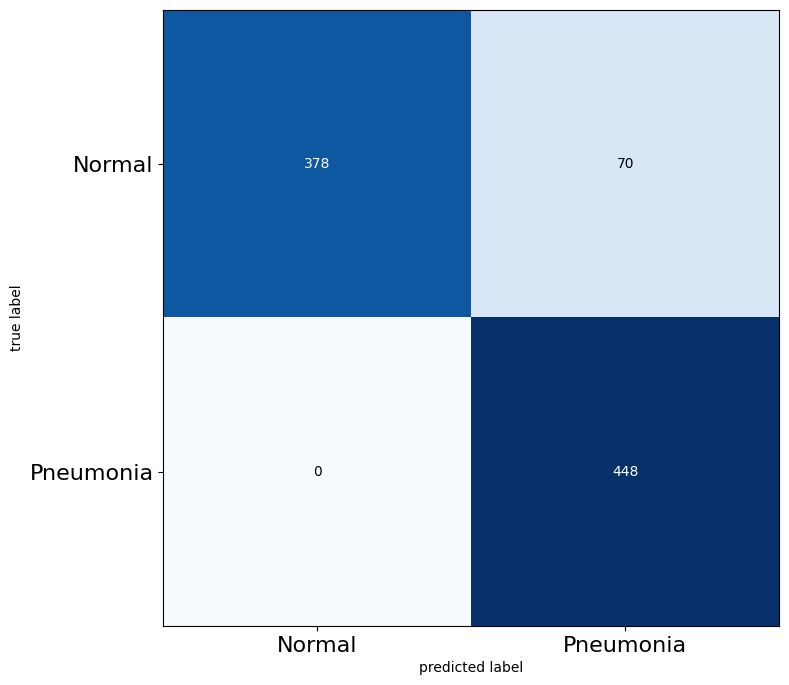

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
# Get the confusion matrix
cm  = confusion_matrix(np.argmax(B_test, axis = 1), np.argmax(pred_y, axis = 1))
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
#fig.savefig('roc_valid.pdf')
plt.savefig('confusion_matrix.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [ ]:
# Assuming you have compiled and trained your model
# Save the weights to your Google Drive
model.save_weights("/content/drive/My Drive/save.pat_weights_e-5.h5")


In [ ]:
model.save_weights("/content/drive/My Drive/save.pat_weights_e-5.h5")

In [ ]:
tn, fp, fn, tp = cm.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))

Recall of the model is 1.00
Precision of the model is 0.86


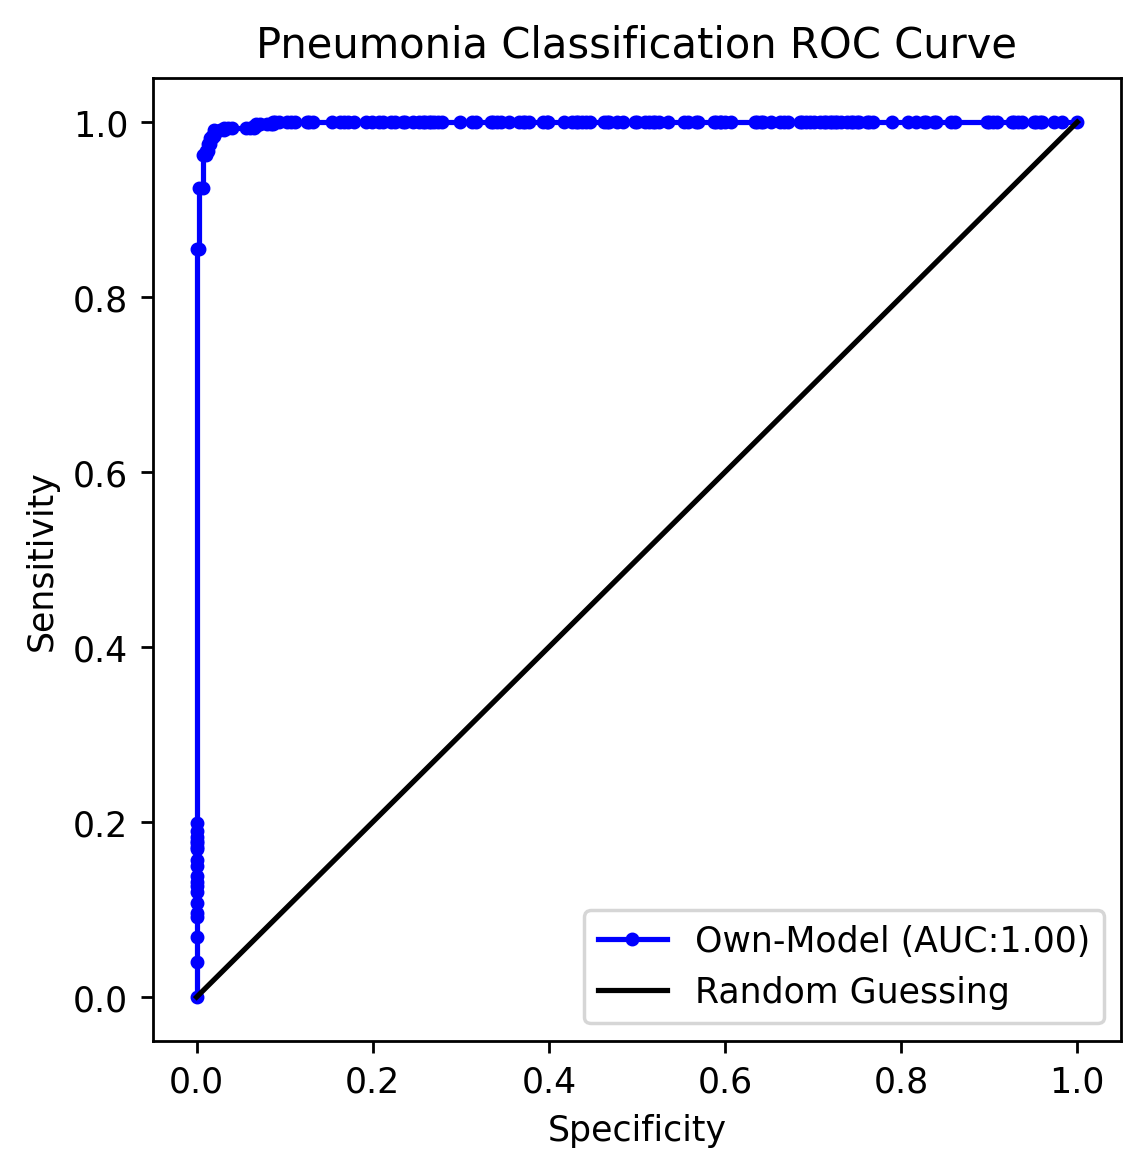

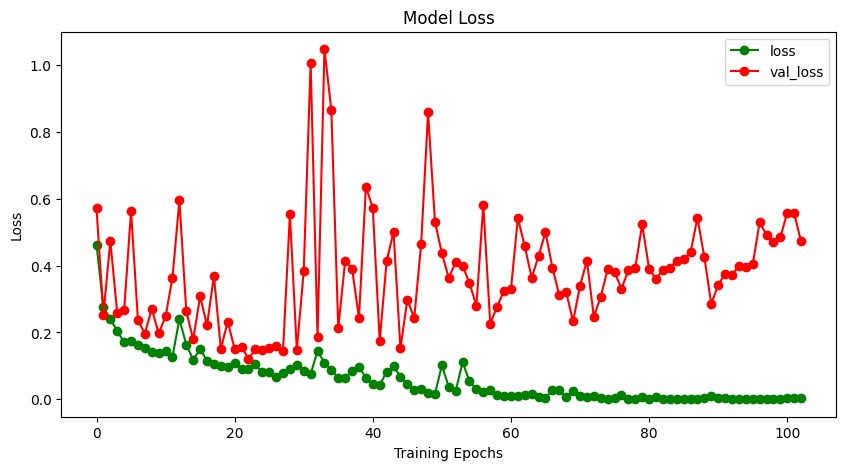

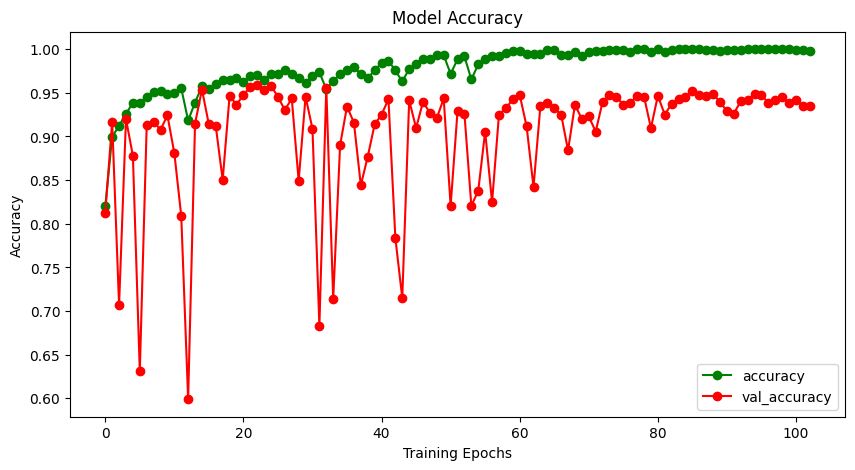

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(np.argmax(B_test,-1)==0, pred_y[:,0])
fig, ax1 = plt.subplots(1,1, figsize = (5, 5), dpi = 250)
ax1.plot(fpr, tpr, 'b.-', label = 'Own-Model (AUC:%2.2f)' % roc_auc_score(np.argmax(B_test,-1)==0, pred_y[:,0]))
ax1.plot(fpr, fpr, 'k-', label = 'Random Guessing')
ax1.legend(loc = 4)
ax1.set_xlabel('Specificity')
ax1.set_ylabel('Sensitivity');
ax1.set_title('Pneumonia Classification ROC Curve', loc='center')
fig.savefig('roc_valid.pdf')

#plots val_loss vs train_loss
plt.figure(figsize = (10, 5))
#plt.title("Model loss")
plt.plot(history.history["loss"], "go-")
plt.plot(history.history["val_loss"], "ro-")
plt.legend(["loss", "val_loss"])
plt.xlabel("Training Epochs")
plt.ylabel("Loss")

# Set plot title at the bottom
plt.title("Model Loss", loc='center')
fig.savefig('loss.pdf', format='pdf', bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 5))
#plt.title("Model accuracy")
plt.plot(history.history["categorical_accuracy"], "go-")  # Change "accuracy" to "acc"
plt.plot(history.history["val_categorical_accuracy"], "ro-")  # Change "val_accuracy" to "val_acc"
plt.legend(["accuracy", "val_accuracy"])
plt.xlabel("Training Epochs")
plt.ylabel("Accuracy")


# Set plot title at the bottom
plt.title("Model Accuracy", loc='center')
fig.savefig('accuracy.pdf', format='pdf', bbox_inches='tight')
plt.show()


In [ ]:
# Check available keys in history
print(history.history.keys())



dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy', 'lr'])


In [ ]:
print(history.history)

{'loss': [0.47673678398132324, 0.26128262281417847, 0.22889816761016846, 0.2212805300951004, 0.2050582319498062, 0.18562331795692444, 0.16976594924926758, 0.1540556401014328, 0.16866132616996765, 0.1599278450012207, 0.16103050112724304, 0.1401263326406479, 0.1241692304611206, 0.11876468360424042, 0.10644138604402542, 0.11143182963132858, 0.0964370146393776, 0.10085823386907578, 0.0812133401632309, 0.09376963973045349, 0.08980098366737366, 0.08610882610082626, 0.07573633641004562, 0.08181069046258926, 0.0689459964632988, 0.09746153652667999, 0.09358715265989304, 0.057864610105752945, 0.06378147006034851, 0.047952521592378616, 0.03491412103176117, 0.04192250594496727, 0.03313390538096428, 0.027726998552680016, 0.04142937809228897, 0.028041834011673927, 0.04685218259692192, 0.049483612179756165, 0.03671368956565857, 0.009187460877001286, 0.012322906404733658, 0.008845144882798195, 0.022502072155475616, 0.0069700004532933235, 0.008650446310639381, 0.0062598418444395065, 0.00764129171147942

In [ ]:
import pickle
with open('/trainHistoryDict', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [ ]:
import pandas as pd

# assuming you stored your model.fit results in a 'history' variable:
history = model.fit(x_train, y_train, epochs=10)

# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(history.history)

# save to json:
hist_json_file = 'history.json'
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

# or save to csv:
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

Epoch 1/10
153/153 [==============================] - 54s 313ms/step - loss: 0.0948 - categorical_accuracy: 0.9819
Epoch 2/10
153/153 [==============================] - 44s 285ms/step - loss: 0.0555 - categorical_accuracy: 0.9858
Epoch 3/10
153/153 [==============================] - 44s 289ms/step - loss: 0.0384 - categorical_accuracy: 0.9899
Epoch 4/10
153/153 [==============================] - 44s 285ms/step - loss: 0.0372 - categorical_accuracy: 0.9908
Epoch 5/10
153/153 [==============================] - 44s 286ms/step - loss: 0.0313 - categorical_accuracy: 0.9920
Epoch 6/10
153/153 [==============================] - 44s 285ms/step - loss: 0.0308 - categorical_accuracy: 0.9922
Epoch 7/10
153/153 [==============================] - 44s 285ms/step - loss: 0.0295 - categorical_accuracy: 0.9930
Epoch 8/10
153/153 [==============================] - 44s 285ms/step - loss: 0.0267 - categorical_accuracy: 0.9930
Epoch 9/10
153/153 [==============================] - 44s 285ms/step - loss: 0.0

In [ ]:
with open('/trainHistoryDict', "rb") as file_pi:
    history = pickle.load(file_pi)

In [ ]:

channel_axis = -1# if backend.image_data_format() == 'channels_first' else -1
def model():
    img_input = layers.Input(shape = (224, 224, 1))
    x = layers.Conv2D(32, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block1_conv1')(img_input)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block1_bn1')(x)
    x = layers.Activation('relu', name = 'block1_act1')(x)
    x = layers.Conv2D(32, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block1_conv2')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block1_bn2')(x)
    x = layers.Activation('relu', name = 'block1_act2')(x)
    x = layers.MaxPooling2D((2, 2),
                            strides=(2, 2),
                            padding='same',
                            name='block1_pool')(x)

    # block 2
    x = layers.Conv2D(64, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block2_conv1')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block2_bn1')(x)
    x = layers.Activation('relu', name = 'block2_act1')(x)
    x = layers.Conv2D(64, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block2_conv2')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block2_bn2')(x)
    x = layers.Activation('relu', name = 'block2_act2')(x)
    x = layers.MaxPooling2D((2, 2),
                            strides=(2, 2),
                            padding='same',
                            name='block2_pool')(x)
# block 3
    x = layers.Conv2D(128, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block3_conv1')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block3_bn1')(x)
    x = layers.Activation('relu', name = 'block3_act1')(x)
    x = layers.Conv2D(128, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block3_conv2')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block3_bn2')(x)
    x = layers.Activation('relu', name = 'block311_act2')(x)
    x = layers.MaxPooling2D((3, 3),
                            strides=(3, 3),
                            padding='same',
                            name='block3_pool')(x)

    x = layers.Conv2D(256, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block31_conv1')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block31_bn1')(x)
    x = layers.Activation('relu', name = 'block31_act1')(x)
    x = layers.Conv2D(128, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block31_conv2')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block31_bn2')(x)
    x = layers.Activation('relu', name = 'block31_act2')(x)
    x = layers.MaxPooling2D((3, 3),
                            strides=(3, 3),
                            padding='same',
                            name='block31_pool')(x)

  # block 4
    x = layers.Conv2D(1024, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block41_conv1')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block41_bn1')(x)
    x = layers.Activation('relu', name = 'block41_act1')(x)
    x = layers.Conv2D(512, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block41_conv2')(x)
    x = layers.Conv2D(512, (7,7),
                      padding = 'same', use_bias = False,
                      name = 'block41_conv7filter')(x)
    x = layers.Dropout(0.5, name = 'block4_dropout')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block4_bn2')(x)
    x = layers.Activation('relu', name = 'block4_act2')(x)
    x = layers.MaxPooling2D((3, 3),
                            strides=(3, 3),
                            padding='same',
                            name='block4_pool')(x)
    x = layers.Flatten(name='flatten')(x)
    x = layers.Dense(512, activation='relu', name='fc1')(x)
    x = layers.Dense(1024, activation='relu', name='fc11')(x)
    x = layers.Dense(512, activation='relu', name='fc3')(x)
    x = layers.Dense(512, activation='relu', name='fc4')(x)
    x = layers.Dense(256, activation='relu', name='fc5')(x)
    x = layers.Dense(64, activation='relu', name='fc6')(x)
    x = layers.Dense(2, activation='softmax', name='predictions')(x)
    model = Model(inputs=img_input, outputs=x, name = 'own_build_model')
    return model
model = model()
model.summary()

Model: "own_build_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 32)      288       
                                                                 
 block1_bn1 (BatchNormaliza  (None, 224, 224, 32)      128       
 tion)                                                           
                                                                 
 block1_act1 (Activation)    (None, 224, 224, 32)      0         
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 32)      9216      
                                                                 
 block1_bn2 (BatchNormaliza  (None, 224, 224, 32)      128       
 tion)                                             